In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

In [2]:
# neighber.base 라이브러리 이름을 neighber._base로 변경하기
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

In [3]:
# 엑셀파일에서 데이터 불러오기
df = pd.read_excel("edit_Data.xlsx", engine = 'openpyxl')

In [4]:
df.shape

(22182, 124)

In [5]:
# 결측치가 있는 columns만을 추출
missing_df = df.columns[df.isnull().any()].tolist()
# msno.heatmap(df[missing_df], annot=True, figsize=(100,100))

In [6]:
len(missing_df)

102

In [7]:
# original 데이터프레임 df를 data에 복사
data = df

In [8]:
data.shape

(22182, 124)

In [9]:
# Colums에서 결측값이 총데이터의 20% 이상인 열은 제거
str_ = []
for i in range(len(data.columns)):
    if data[[data.columns[i]]].isnull().sum()[0] > len(data)*0.2:
        str_.append( str(data.columns[i]) )
print(str_)
data = data.drop(str_,axis=1)

['prior HF', 'prior MI', 'DTN time (min)', 'Q36-5 thrombolysis 결과 (fail-0, success-1)', 'door to cath room (min)', 'DTB time (min)', 'Sx to balloon time (hr)', 'Q37-6 GpII/IIIa 사용여부', 'Q37-8 approach (TRI-0, TFI-1, other-2)', 'stent 종류 (BMS-0, DES-1)', 'stent length Q38-8-2', 'diameter Q38-8-3', 'number Q38-8-4', 'Q41-1 CSU stay (day)', 'Q42-3 RWMI', 'Q42-5 LVESD', 'Q42-6 LVEDD', 'Q42-7 LVESV', 'LVESVi', 'LVEDVi', 'Q42-8 LVEDV', 'Q59 pro-BNP', 'Q60 BNP', 'Q61 HbA1c', 'ST']


In [10]:
data.shape
# msno.bar(data)

(22182, 99)

In [11]:
# string으로 인식된 데이터값 null로 대체
data['result (successful-2, sub-1, failed-0)'][data['result (successful-2, sub-1, failed-0)'] == 'PCI was not preferred'] = np.nan
data['Q47 glucose'][data['Q47 glucose']=='22+'] = np.nan
data['Q47 glucose'][data['Q47 glucose']=='`90'] = np.nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [12]:
# RandomForest missing 방법으로 결측치 대체
imputer = MissForest()
data_imputed = imputer.fit_transform(data)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [13]:
# 결측치 대체하니 numpy로 출력돼서 데이타프레임 씌워줌
data_ = pd.DataFrame(data = data_imputed, columns = data.columns)

In [30]:
print(x.shape)
print (y[y==0].shape,y[y==1].shape)

(3680, 92)
(392,) (3288,)


In [15]:
# LVEF 40%이하에서의 생존률을 확인하는것이 목표.
data_LVEF = data_[data_['Q42-2 LVEF']<=40]
x = data_LVEF.drop(['Q87 survival (inhospital death-0, survival-1)',
                    'MACE(cardiac death-0, noncardiac death-1, TLR-2, TVR-3, NTV-4, reMI-5, ST-6, CABG-7, No MACE-8)',
                    'MACE (없다-0, 있다-1)',
                    'cardiac death',
                   'death of any causes',
                   'number',
                   'total number'],axis=1)
y = data_LVEF['Q87 survival (inhospital death-0, survival-1)']

/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:02:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

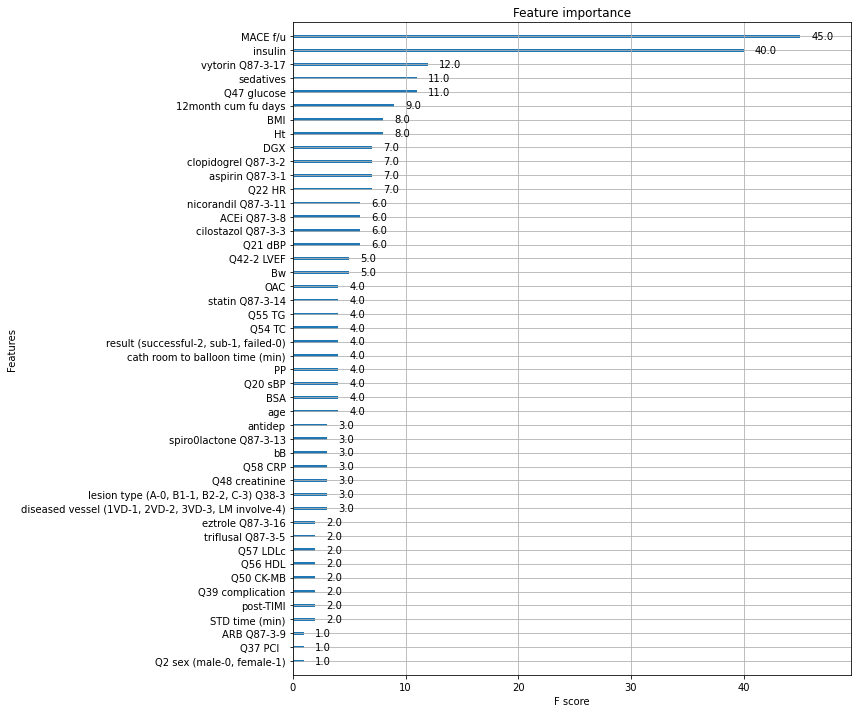

In [17]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y)
# 모델 선언
model = xgb.XGBClassifier() 

# 모델 훈련
model.fit(x_train,y_train) 
# 모델 예측
y_pred = model.predict(x_test)

fig, ax = plt.subplots(figsize=(10,12))
xgb.plot_importance(model, ax=ax)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

forest = RandomForestClassifier()

forest.fit(x, y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(x.shape[1]):
    print("{}. {} ({:.3f})".format(f + 1, x.columns[indices][f], importances[indices[f]]))



plt.figure(figsize=(25,30))
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), x.columns[indices], rotation=90)
plt.xlim([-1, x.shape[1]])
plt.show()




목표 1 :  초기에 심초음파에서 Ejection fraction 40% 이하인 사람의 사망예측   


목표 2 :  추적 심초음파에서 호전여부를 예측하는 모델




# SMOTE를 통한 over sampling

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
x_train_over,y_train_over = smote.fit_resample(x,y)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x.shape, pd.Series(y).value_counts())
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

In [ ]:
print(x.shape, y.shape)
print(y[y==1].shape,y[y==1].shape)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# logistic regression - all features

In [ ]:
data_LVEF = data_[data_['Q42-2 LVEF']<=40]
x = data_LVEF.drop(['Q87 survival (inhospital death-0, survival-1)',
                    'MACE(cardiac death-0, noncardiac death-1, TLR-2, TVR-3, NTV-4, reMI-5, ST-6, CABG-7, No MACE-8)',
                    'MACE (없다-0, 있다-1)',
                    'cardiac death',
                   'death of any causes',
                   'number',
                   'total number'],axis=1)
y = data_LVEF['Q87 survival (inhospital death-0, survival-1)']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True,stratify=y)

lr_all = LogisticRegression(max_iter = 100)
lr_all.fit(x_train,y_train)
y_pred = lr_all.predict(x_test)

f1_acc = f1_score(y_test, y_pred)

acc = accuracy_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, lr_all.predict_proba(x_test)[:, 1])
roc_auc = metrics.roc_auc_score(y_test, lr_all.predict_proba(x_test)[:, 1])

TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
TNR = TN/(TN+FP)
TPR = TP/(TP+FN)

print("f1 score : ", f1_acc)
print("acc : ", acc)
print("roc auc : ", roc_auc)
print("True Negative rate : ", TNR)
print("recall : ", TPR)

# logistic regression - 3 features

In [ ]:
x = x[['insulin','MACE f/u','clopidogrel Q87-3-2']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True,stratify=y)

lr_all = LogisticRegression()
lr_all.fit(x_train,y_train)
y_pred = lr_all.predict(x_test)

f1_acc = f1_score(y_test, y_pred)

acc = accuracy_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, lr_all.predict_proba(x_test)[:, 1])
roc_auc = metrics.roc_auc_score(y_test, lr_all.predict_proba(x_test)[:, 1])

TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
TNR = TN/(TN+FP)
TPR = TP/(TP+FN)

print("f1 score : ", f1_acc)
print("acc : ", acc)
print("roc auc : ", roc_auc)
print("True Negative rate : ", TNR)
print("recall : ", TPR)

# random forest classifier - all features

In [ ]:
x = data_LVEF.drop(['Q87 survival (inhospital death-0, survival-1)',
                    'MACE(cardiac death-0, noncardiac death-1, TLR-2, TVR-3, NTV-4, reMI-5, ST-6, CABG-7, No MACE-8)',
                    'MACE (없다-0, 있다-1)',
                    'cardiac death',
                   'death of any causes',
                   'number',
                   'total number'],axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y)

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

f1_acc = f1_score(y_test, y_pred)

acc = accuracy_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
roc_auc = metrics.roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
TNR = TN/(TN+FP)
TPR = TP/(TP+FN)

print("f1 score : ", f1_acc)
print("acc : ", acc)
print("roc auc : ", roc_auc)
print("True Negative rate : ", TNR)
print("recall : ", TPR)

# random forest classifier - 3 features

In [ ]:
x = x[['insulin','MACE f/u','clopidogrel Q87-3-2']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y)

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

f1_acc = f1_score(y_test, y_pred)

acc = accuracy_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
roc_auc = metrics.roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
TNR = TN/(TN+FP)
TPR = TP/(TP+FN)

print("f1 score : ", f1_acc)
print("acc : ", acc)
print("roc auc : ", roc_auc)
print("True Negative rate : ", TNR)
print("recall : ", TPR)

# svm - all features

In [ ]:
x = data_LVEF.drop(['Q87 survival (inhospital death-0, survival-1)',
                    'MACE(cardiac death-0, noncardiac death-1, TLR-2, TVR-3, NTV-4, reMI-5, ST-6, CABG-7, No MACE-8)',
                    'MACE (없다-0, 있다-1)',
                    'cardiac death',
                   'death of any causes',
                   'number',
                   'total number'],axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y)

model = svm.SVC(kernel='linear',probability=True)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

f1_acc = f1_score(y_test, y_pred)

acc = accuracy_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
roc_auc = metrics.roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
TNR = TN/(TN+FP)
TPR = TP/(TP+FN)

print("f1 score : ", f1_acc)
print("acc : ", acc)
print("roc auc : ", roc_auc)
print("True Negative rate : ", TNR)
print("recall : ", TPR)

# svm - 3 features

In [ ]:
x = x[['insulin','MACE f/u','clopidogrel Q87-3-2']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y)

model = svm.SVC(kernel='linear',probability=True)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

f1_acc = f1_score(y_test, y_pred)

acc = accuracy_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
roc_auc = metrics.roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
TNR = TN/(TN+FP)
TPR = TP/(TP+FN)

print("f1 score : ", f1_acc)
print("acc : ", acc)
print("roc auc : ", roc_auc)
print("True Negative rate : ", TNR)
print("recall : ", TPR)

# confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(5)
evaluation = ['F1 score', 'Accuracy', 'ROC AUC', 'TN rate', 'Recall']
values = [0.714, 0.833, 0.818, 0.856, 0.780]

plt.bar(x, values, width=0.4)
# plt.bar(x, values, width=0.6)
# plt.bar(x, values, width=0.8)
# plt.bar(x, values, width=1.0)
plt.xticks(x, evaluation)

plt.show()

In [ ]:
# Dodged Bar Chart (with same X coordinates side by side)

label = ['F1 score', 'Accuracy', 'ROC AUC', 'TN rate', 'Recall']

tips_sum_by_day_male = [0.719, 0.838, 0.822, 0.860, 0.785]
tips_sum_by_day_female = [0.987, 0.978, 0.991, 0.911, 0.986]

index = np.arange(len(label))

bar_width = 0.35

alpha = 0.5

plt.figure(figsize=(5,4))

p1 = plt.bar(index, tips_sum_by_day_male, 
             bar_width, 
             color='b', 
             alpha=alpha,
             label='Male')

p2 = plt.bar(index + bar_width, tips_sum_by_day_female, 
             bar_width, 
             color='r', 
             alpha=alpha,
             label='Female')

plt.title('Logistic regression with 3 features', fontsize=12)

plt.ylim(0,1.5)
plt.ylabel('Value', fontsize=10)

plt.xlabel('Evaluation', fontsize=10)

plt.xticks(index, label, fontsize=7.5)

plt.legend((p1[0], p2[0]), ('Other research', 'This research'), fontsize=9)

plt.show()
